In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
file_path = '.\Sejm-20240316T162344Z-001\Sejm\GLO3k1p119p_i\GLO3k1p119p_i.xml'

In [4]:
def xml_to_dataframe(xml_file):
    
    """Takes a directory of a xml file and returns a dataframe."""
    
    data = []
    columns = ["kadencja", "posiedzenie", "numer", "data", "godzina", "tryb", "tytul", "temat", "opis", "url", "za", "przeciw", "wstrzym", "niegl", "Nrleg", "NazwiskoImie", "Glos", "Klub"]
    
    with open(xml_file, "r", encoding="utf-8") as f:
        context = ET.iterparse(f, events=("start", "end"))
        _, root = next(context)  # Get root element

        for event, element in context:
            if event == "end" and element.tag == "Glosowanie":
                row_data = {}
                row_data["kadencja"] = element.get("kadencja")
                row_data["posiedzenie"] = element.get("posiedzenie")
                row_data["numer"] = element.get("numer")
                row_data["data"] = element.get("data")
                row_data["godzina"] = element.get("godzina")
                row_data["tryb"] = element.get("tryb")
                row_data["tytul"] = element.find("Tytul").text if element.find("Tytul") is not None else None
                row_data["temat"] = element.find("Temat").text if element.find("Temat") is not None else None
                row_data["opis"] = element.find("Opis").text if element.find("Opis") is not None else None
                row_data["url"] = element.find("url").text if element.find("url") is not None else None

                wyniki = element.find("Wyniki")
                if wyniki:
                    row_data["za"] = wyniki.get("za")
                    row_data["przeciw"] = wyniki.get("przeciw")
                    row_data["wstrzym"] = wyniki.get("wstrzym")
                    row_data["niegl"] = wyniki.get("niegl")
                    for glos_posla in wyniki.findall("GlosPosla"):
                        glosowanie_data = row_data.copy()
                        glosowanie_data["Nrleg"] = glos_posla.find("Nrleg").text if glos_posla.find("Nrleg") is not None else None
                        glosowanie_data["NazwiskoImie"] = glos_posla.find("NazwiskoImie").text if glos_posla.find("NazwiskoImie") is not None else None
                        glosowanie_data["Glos"] = glos_posla.find("Glos").text if glos_posla.find("Glos") is not None else None
                        glosowanie_data["Klub"] = glos_posla.find("Klub").text if glos_posla.find("Klub") is not None else None
                        data.append(glosowanie_data)

                root.clear()  # Clear the root element to free up memory
        
    df = pd.DataFrame(data, columns=columns)
    return df

In [5]:
df = xml_to_dataframe(file_path)

In [6]:
df['data_godzina'] = pd.to_datetime(df['data'] + ' ' + df['godzina'])
# df['glosowanie_id'] = df['kadencja'] + '_' + df['posiedzenie'] + '_' + df['numer']

df = df.astype({
                'za': 'int32',
                'przeciw': 'int32',
                'wstrzym': 'int32',
                'niegl': 'int32',
                'data': 'datetime64[ns]',
                'Nrleg': 'int32',
                'kadencja': 'int32',
                'posiedzenie': 'int32',
                'numer': 'int32',
                })

df['vote_id'] = df['kadencja'] * 10**6 + df['posiedzenie'] * 10**3 + df['numer']

In [13]:
df.columns

Index(['kadencja', 'posiedzenie', 'numer', 'data', 'godzina', 'tryb', 'tytul',
       'temat', 'opis', 'url', 'za', 'przeciw', 'wstrzym', 'niegl', 'Nrleg',
       'NazwiskoImie', 'Glos', 'Klub', 'data_godzina', 'vote_id'],
      dtype='object')

In [14]:
df_ = df[['vote_id', 'data_godzina', 'Nrleg', 'NazwiskoImie', 'Glos', 'Klub']] 

In [15]:
df_.to_csv('GLO3k1p119p_i.csv', index=False)

In [40]:
dates = df['data'].unique()

In [41]:
dates

array(['1997-10-20', '1997-10-21', '1997-10-28', '1997-11-05',
       '1997-11-06', '1997-11-10', '1997-11-11', '1997-11-19',
       '1997-11-20', '1997-12-03', '1997-12-04', '1997-12-11',
       '1997-12-12', '1997-12-17', '1997-12-18', '1997-12-30',
       '1998-01-08', '1998-01-22', '1998-01-23', '1998-02-06',
       '1998-02-19', '1998-03-04', '1998-03-05', '1998-03-19',
       '1998-03-20', '1998-04-01', '1998-04-02', '1998-04-03',
       '1998-04-22', '1998-04-23', '1998-04-24', '1998-05-06',
       '1998-05-07', '1998-05-08', '1998-05-20', '1998-05-21',
       '1998-05-22', '1998-06-03', '1998-06-04', '1998-06-05',
       '1998-06-18', '1998-06-19', '1998-06-25', '1998-06-26',
       '1998-07-01', '1998-07-02', '1998-07-03', '1998-07-16',
       '1998-07-17', '1998-07-18', '1998-07-23', '1998-07-24',
       '1998-07-25', '1998-08-27', '1998-08-28', '1998-09-10',
       '1998-09-11', '1998-09-16', '1998-09-22', '1998-09-23',
       '1998-09-29', '1998-09-30', '1998-10-13', '1998-

In [400]:
df.dtypes

kadencja                  int32
posiedzenie               int32
numer                     int32
data             datetime64[ns]
godzina                  object
tryb                     object
tytul                    object
temat                    object
opis                     object
url                      object
za                        int32
przeciw                   int32
wstrzym                   int32
niegl                     int32
Nrleg                     int32
NazwiskoImie             object
Glos                     object
Klub                     object
data_godzina     datetime64[ns]
glosowanie_id            object
vote_id                   int32
dtype: object

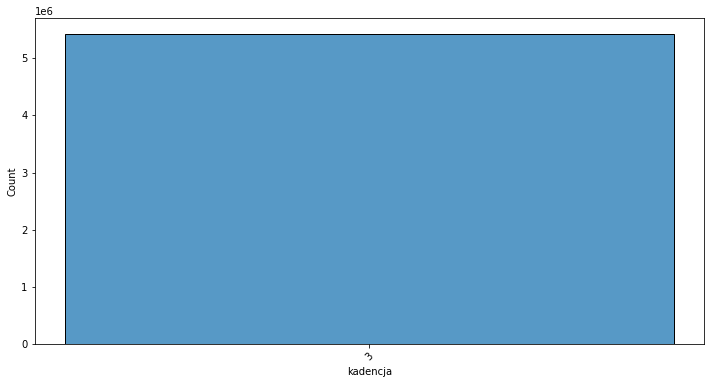

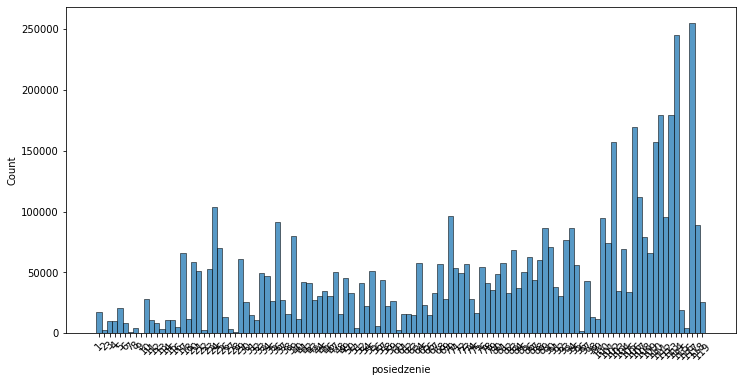

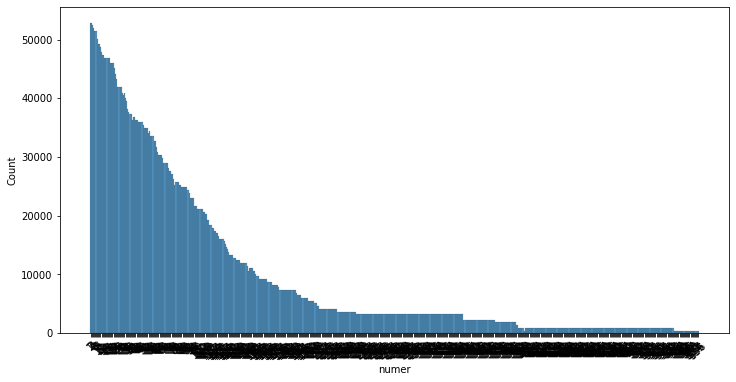

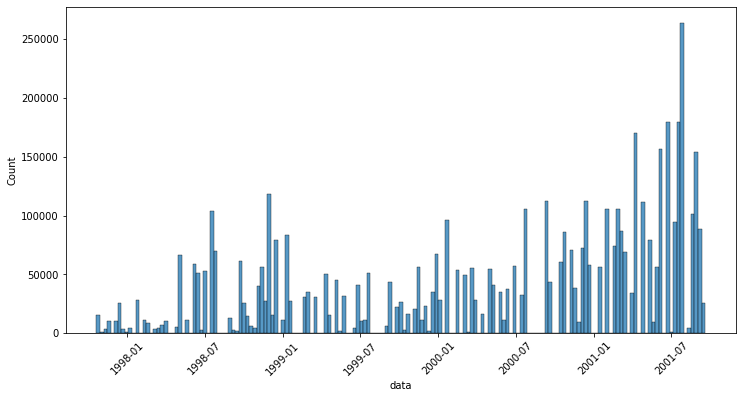

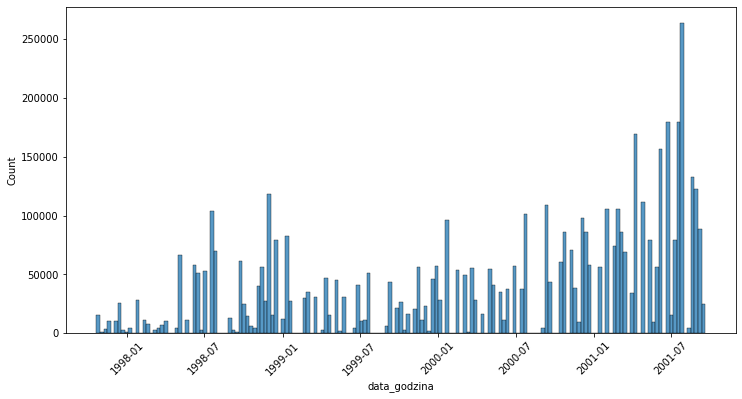

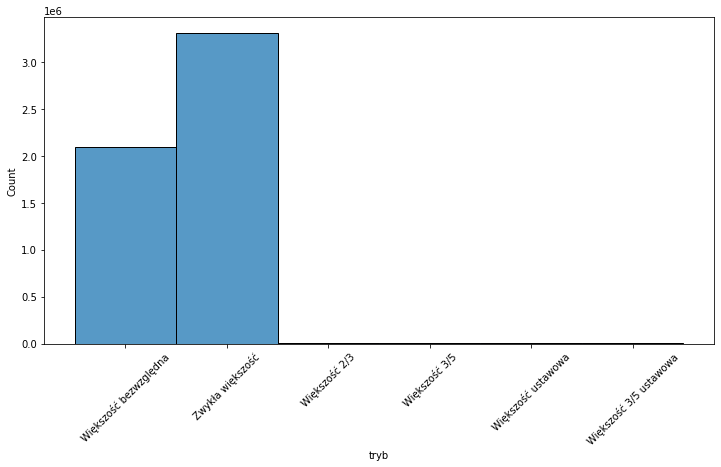

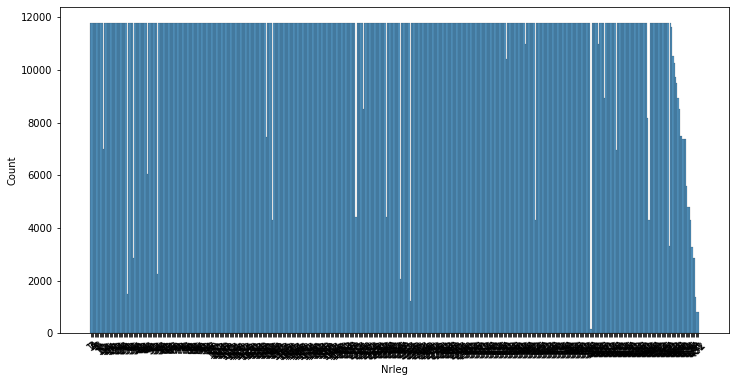

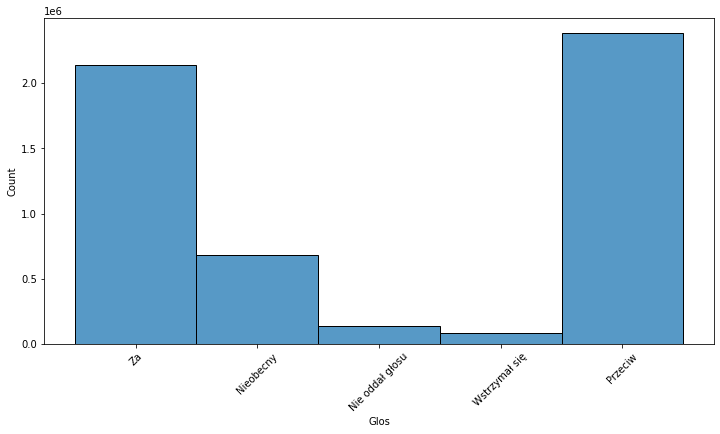

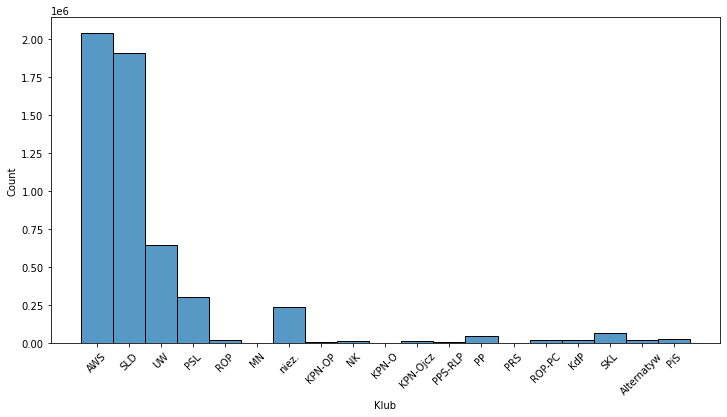

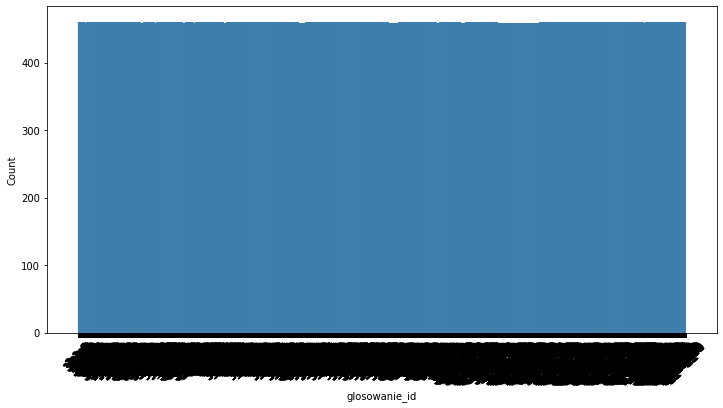

In [76]:
cols_hist = ['kadencja', 'posiedzenie', 'numer', 'data', 'data_godzina', 'tryb', 'Nrleg', 'Glos', 'Klub', 'glosowanie_id']
for col in cols_hist:
    plt.figure(figsize=(12, 6))
    if df[col].dtype == 'object':
        sns.histplot(data=df, x=col, discrete=True)
    else:
        sns.histplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()

In [229]:
df_agg = df[['vote_id', 'glosowanie_id', 'kadencja', 'posiedzenie', 'numer', 'data', 'data_godzina', 'godzina', 'tryb', 'tytul',
       'temat', 'opis', 'url', 'za', 'przeciw', 'wstrzym', 'niegl']]

df_agg = df_agg.drop_duplicates(ignore_index=True)

In [230]:
df_agg

,vote_id,glosowanie_id,kadencja,posiedzenie,numer,data,data_godzina,godzina,tryb,tytul,temat,opis,url,za,przeciw,wstrzym,niegl
0,3001001,3_1_1,3,1,1,1997-10-20,1997-10-20 12:51:54,12:51:54,Większość bezwzględna,WYBÓR MARSZAŁKA SEJMU,None,wniosek w sprawie wyboru Marszałka Sejmu,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,446,0,3,11
1,3001002,3_1_2,3,1,2,1997-10-20,1997-10-20 13:44:48,13:44:48,Zwykła większość,PROJEKT UCHWAŁY W SPRAWIE USTALENIA LICZBY WIC...,None,wybór Marszałka Sejmu,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,77,303,72,8
2,3001003,3_1_3,3,1,3,1997-10-20,1997-10-20 13:45:28,13:45:28,Zwykła większość,PROJEKT UCHWAŁY W SPRAWIE USTALENIA LICZBY WIC...,None,całość projektu uchwały,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,342,32,79,7
3,3001004,3_1_4,3,1,4,1997-10-20,1997-10-20 18:22:10,18:22:10,Większość bezwzględna,WYBÓR WICEMARSZAŁKÓW SEJMU,None,całość projektu uchwały,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,255,147,46,12
4,3001005,3_1_5,3,1,5,1997-10-20,1997-10-20 18:23:02,18:23:02,Większość bezwzględna,WYBÓR WICEMARSZAŁKÓW SEJMU,None,None,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,446,4,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11796,3119051,3_119_51,3,119,51,2001-09-18,2001-09-18 16:21:00,16:21:00,Większość bezwzględna,PKT 10. PORZ. DZIEN. SPR. KOMISJI O STAN. SENA...,Głosowanie nad odrzuceniem 4. poprawki Senatu ...,None,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,30,326,2,102
11797,3119052,3_119_52,3,119,52,2001-09-18,2001-09-18 16:22:48,16:22:48,Zwykła większość,PKT 11. PORZ. DZIEN. SPRAWOZDANIA KOMISJI Z DZ...,Głosowanie nad przyjęciem wniosku Komisji Fina...,głosowanie nad wnioskiem Komisji o przyjęcie r...,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,335,7,13,105
11798,3119053,3_119_53,3,119,53,2001-09-18,2001-09-18 16:23:48,16:23:48,Zwykła większość,PKT 11. PORZ. DZIEN. SPRAWOZDANIA KOMISJI Z DZ...,Głosowanie nad przyjęciem wniosku Komisji Fina...,głosowanie nad wnioskiem Komisji o przyjęcie r...,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,340,3,15,102
11799,3119054,3_119_54,3,119,54,2001-09-18,2001-09-18 16:24:46,16:24:46,Zwykła większość,PKT 11. PORZ. DZIEN. SPRAWOZDANIA KOMISJI Z DZ...,Głosowanie nad przyjęciem wniosku Komisji Fina...,głosowanie nad wnioskiem Komisji o przyjęcie r...,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,337,3,16,104


In [231]:
df_agg['data_godzina'].unique().shape

(11796,)

In [232]:
df_agg['glosowanie_id'].unique().shape

(11801,)

In [233]:
df_agg['vote_id'].unique().shape

(11801,)

In [234]:
df_agg['test'] = df_agg['za'] + df_agg['przeciw'] + df_agg['wstrzym'] + df_agg['niegl']

In [405]:
df_agg[df_agg['test'] != 460]

,vote_id,glosowanie_id,kadencja,posiedzenie,numer,data,data_godzina,godzina,tryb,tytul,temat,opis,url,za,przeciw,wstrzym,niegl,test
153,3008001,3_8_1,3,8,1,1998-01-08,1998-01-08 10:57:53,10:57:53,Zwykła większość,PKT 1. PORZ. DZIEN. SPRAWOZDANIE KOMISJI SPRAW...,None,None,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,162,267,6,24,459
154,3008002,3_8_2,3,8,2,1998-01-08,1998-01-08 10:58:43,10:58:43,Zwykła większość,PKT 1. PORZ. DZIEN. SPRAWOZDANIE KOMISJI SPRAW...,None,None,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,274,160,2,23,459
155,3008003,3_8_3,3,8,3,1998-01-08,1998-01-08 19:07:17,19:07:17,Większość bezwzględna,PKT 2. PORZ. DZIEN. WYBÓR CZŁONKÓW RADY POLITY...,None,wybór członka Rady Polityki Pieniężnej,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,197,187,33,42,459
156,3008004,3_8_4,3,8,4,1998-01-08,1998-01-08 19:08:45,19:08:45,Większość bezwzględna,PKT 3. PORZ. DZIEN. WYBÓR GENERALNEGO INSPEKTO...,None,wybór Generalnego Inspektora Danych Osobowych,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,217,197,23,22,459
157,3008005,3_8_5,3,8,5,1998-01-08,1998-01-08 19:10:40,19:10:40,Zwykła większość,PKT 5. PORZ. DZIEN. PIERWSZE CZYTANIE PROJEKTU...,None,None,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,115,255,64,25,459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,3116005,3_116_5,3,116,5,2001-08-11,2001-08-11 00:51:52,00:51:52,Zwykła większość,PKT 1. PORZ. DZIEN. PIERWSZE CZYTANIE PROJEKTU...,Głosowanie nad przyjęciem 7. wniosku mniejszoś...,None,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,153,182,5,119,459
10994,3116006,3_116_6,3,116,6,2001-08-11,2001-08-11 00:52:32,00:52:32,Zwykła większość,PKT 1. PORZ. DZIEN. PIERWSZE CZYTANIE PROJEKTU...,Głosowanie nad przyjęciem 8. wniosku mniejszoś...,None,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,38,302,4,115,459
10995,3116007,3_116_7,3,116,7,2001-08-11,2001-08-11 00:53:39,00:53:39,Zwykła większość,PKT 1. PORZ. DZIEN. PIERWSZE CZYTANIE PROJEKTU...,Głosowanie nad przyjęciem w całości projektu u...,całość projektu ustawy,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,343,0,0,116,459
10996,3116008,3_116_8,3,116,8,2001-08-11,2001-08-11 00:55:15,00:55:15,Zwykła większość,PKT 2. PORZ.DZIEN I CZYTANIE PROJEKTU UST. O S...,Głosowanie nad przyjęciem w całości projektu u...,całość projektu ustawy,https://orka.sejm.gov.pl/SQL.nsf/glosowania?Op...,343,0,0,116,459


In [16]:
df_deputies = df[['Nrleg', 'NazwiskoImie', 'Klub']]
# df_deputies = df_deputies.drop_duplicates(ignore_index=True)
df_deputies = df_deputies.groupby(['Nrleg', 'NazwiskoImie'])['Klub'].agg(['unique']).reset_index().rename(columns={"unique": "Klub"})

In [17]:
df_deputies

,Nrleg,NazwiskoImie,Klub
0,1,Adamczyk Franciszek,[AWS]
1,2,Adamska-Wedler Elżbieta,"[AWS, KPN-OP]"
2,3,Adamski Władysław,[SLD]
3,4,Ajchler Romuald,[SLD]
4,5,Anusz Andrzej,[AWS]
...,...,...,...
477,478,Wiatr Jerzy,[SLD]
478,479,Mioduszewski Józef,[PSL]
479,480,Opala Grzegorz,[AWS]
480,481,Świętochowski Leszek,[PSL]


In [257]:
vote_ids = sorted(df['vote_id'].unique())
deput_ids = [df[df['vote_id'] == vote_id]['Nrleg'].unique() for vote_id in vote_ids]

In [387]:
removed_ids = []
new_ids = []

for i in range(1, len(vote_ids)):
    ids_0 = deput_ids[i-1]
    ids_1 = deput_ids[i]
    
    removed = set(ids_0).difference(ids_1)
    new = set(ids_1).difference(ids_0)
    
    if len(removed) > 0:
        for idd in removed:
            r = (idd, list(df_deputies[df_deputies['Nrleg'] == idd]['Klub'].values[0]), vote_ids[i])
            removed_ids.append(r)
    if len(new) > 0:
        for idd in new:
            n = (idd, list(df_deputies[df_deputies['Nrleg'] == idd]['Klub'].values[0]), vote_ids[i])
            new_ids.append(n)

In [388]:
removed_ids, len(removed_ids)

([(397, ['SLD'], 3008001),
  (254, ['SLD'], 3026001),
  (30, ['PSL'], 3032001),
  (246, ['AWS'], 3038001),
  (54, ['UW'], 3040001),
  (35, ['UW'], 3048003),
  (459, ['AWS'], 3056001),
  (145, ['SLD'], 3071001),
  (353, ['AWS'], 3071001),
  (443, ['AWS'], 3071001),
  (211, ['UW'], 3072001),
  (235, ['SLD'], 3072001),
  (46, ['AWS'], 3089001),
  (417, ['SLD'], 3095096),
  (11, ['UW'], 3097001),
  (140, ['AWS'], 3101086),
  (442, ['AWS'], 3106001),
  (217, ['PSL'], 3107001),
  (408, ['SLD'], 3109001),
  (330, ['AWS'], 3114001),
  (403, ['SLD'], 3116001),
  (345, ['PSL'], 3116001)],
 22)

In [389]:
new_ids, len(new_ids)

([(461, ['SLD'], 3009001),
  (462, ['SLD'], 3027001),
  (463, ['PSL'], 3033001),
  (464, ['AWS', 'niez.'], 3039001),
  (465, ['UW'], 3041001),
  (466, ['UW'], 3049001),
  (467, ['AWS', 'PiS'], 3056001),
  (468, ['SLD'], 3071001),
  (469, ['AWS'], 3071001),
  (470, ['AWS', 'SKL'], 3072004),
  (471, ['SLD'], 3072004),
  (472, ['UW', 'niez.'], 3072004),
  (473, ['AWS', 'niez.'], 3090001),
  (474, ['SLD'], 3097001),
  (475, ['UW', 'niez.'], 3097001),
  (476, ['AWS'], 3102001),
  (477, ['AWS'], 3107001),
  (478, ['SLD'], 3109001),
  (479, ['PSL'], 3109001),
  (480, ['AWS'], 3114001),
  (481, ['PSL'], 3116001),
  (482, ['SLD'], 3117001)],
 22)

In [390]:
ids_pairs = []
node_id_dict = {i:i for i in range(1, 461)}

while len(removed_ids) > 0:
    r_id, r_c, r_v_id = removed_ids.pop(0)
    search = 1
    i = 0
    while search and i < len(new_ids):
        n_id, n_c, n_v_id = new_ids[i]
        if len(set(r_c).intersection(set(n_c))) > 0 and r_v_id <= n_v_id:
            ids_pairs.append((r_id, n_id))
            node_id_dict[n_id] = r_id
            new_ids.pop(i)
            search = 0
        i += 1

In [372]:
removed_ids

[]

In [373]:
new_ids

[]

In [413]:
node_id_dict_func = lambda x: node_id_dict[x]
node_id_dict_func = np.vectorize(node_id_dict_func)

In [414]:
df_deputies['node_id'] = node_id_dict_func(df_deputies['Nrleg'])

In [415]:
df_deputies

,Nrleg,NazwiskoImie,Klub,node_id
0,1,Adamczyk Franciszek,[AWS],1
1,2,Adamska-Wedler Elżbieta,"[AWS, KPN-OP]",2
2,3,Adamski Władysław,[SLD],3
3,4,Ajchler Romuald,[SLD],4
4,5,Anusz Andrzej,[AWS],5
...,...,...,...,...
477,478,Wiatr Jerzy,[SLD],408
478,479,Mioduszewski Józef,[PSL],217
479,480,Opala Grzegorz,[AWS],330
480,481,Świętochowski Leszek,[PSL],345


In [416]:
pd.merge(df[['Nrleg', 'NazwiskoImie', 'Glos', 'data_godzina', 'vote_id']], df_deputies, how='left', on=['Nrleg', 'NazwiskoImie'])

,Nrleg,NazwiskoImie,Glos,data_godzina,vote_id,Klub,node_id
0,1,Adamczyk Franciszek,Za,1997-10-20 12:51:54,3001001,[AWS],1
1,2,Adamska-Wedler Elżbieta,Za,1997-10-20 12:51:54,3001001,"[AWS, KPN-OP]",2
2,3,Adamski Władysław,Za,1997-10-20 12:51:54,3001001,[SLD],3
3,4,Ajchler Romuald,Za,1997-10-20 12:51:54,3001001,[SLD],4
4,5,Anusz Andrzej,Za,1997-10-20 12:51:54,3001001,[AWS],5
...,...,...,...,...,...,...,...
5427086,456,Żak Piotr,Za,2001-09-18 16:26:05,3119055,"[AWS, niez.]",456
5427087,457,Żelazowski Andrzej,Za,2001-09-18 16:26:05,3119055,[SLD],457
5427088,458,Żelichowski Stanisław,Nieobecny,2001-09-18 16:26:05,3119055,[PSL],458
5427089,460,Żyliński Adam Jacek,Nieobecny,2001-09-18 16:26:05,3119055,[UW],460
